![image](https://docs.google.com/uc?export=download&id=1NUy1Q-abpoV9XYK9qT9t8Mdhj3ZVlveO)


# **Taller 1**

- **Integrante 1: Emil Rueda**
- **Integrante 2: Juan Sepulveda**

### **Problemática**:
En un entorno clínico, los profesionales de la salud enfrentan el desafío de interpretar los resultados de las pruebas médicas de manera rápida y precisa para tomar decisiones informadas sobre el tratamiento y el seguimiento de los pacientes. Sin embargo, debido a la gran cantidad de datos y la complejidad de las condiciones médicas, esta tarea resulta muy tediosa.

Problema específico: Los resultados de las pruebas médicas, que se describen como "Normal," "Anormal," o "Inconcluso," deben ser interpretados con precisión para determinar la necesidad de seguimiento adicional o tratamiento especializado.
        
Los datos y el diccionario de datos lo pueden encontrar [acá](https://www.kaggle.com/datasets/prasad22/healthcare-dataset/data).

&nbsp;

### **Preguntas:**
1. Realice el debido preprocesamiento de los datos, feature engineering, EDA, Encoding Techniques, etc... Dentro de un pipeline que almacene todo el proceso.

2. Genere un modelo MLP base de predicción. Confirme si su modelo generaliza bien, o si presenta sobreajuste o subajuste. Si es alguna de las dos últimas opciones, ¿qué opciones propone para que la red MLP generalice mejor?

3. Realice una búsqueda de hiperparámetros para encontrar el mejor modelo. Documentarlo en un cuadro comparativon con el modelo base del punto anterior.

4. ¿Cómo podemos mejorar el tiempo de entrenamiento de los modelos? ¿Que es el EarlyStopping y cómo se puede automatizar utilizando callback? Está pregunta es más teórica, pero pueden incluir código si lo creen necesario.

### NOTA IMPORTANTE
- El archivo a presentar debe ser en formato .ipynb o HTML ya ejecutado. Celda que no esté ejecutada no se podrá evaluar.
- El nombre del archivo debe ser `taller_1_{Apellido_Nombre}_{Apellido_Nombre}` de cada integrante respectivamente.

## 

## **Prevs**


## **Packs**

In [19]:
import sklearn
import tensorflow as tf

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

#Verificamos las versiones de las librerías
print(f"La versión de sklearn es: {sklearn.__version__}")
print('Tensorflow version:', tf.__version__)

La versión de sklearn es: 1.5.1
Tensorflow version: 2.17.0


In [22]:
device_name = tf.test.gpu_device_name()
gpu_name = '/device:GPU:0'
if device_name != gpu_name:
  raise SystemError('GPU device not found') # type: ignore
print('Found GPU at: {}'.format(device_name))

SystemError: GPU device not found

## **Dataset**

In [4]:
df = pd.read_csv(r"data/healthcare_dataset.csv")
print(df.info())
print(df.describe())
# Conteo valores nulos
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

/var/folders/1m/knww9kwx5h7fh3m8lly94_br6k_qlj/T/ipykernel_25906/1632866130.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")


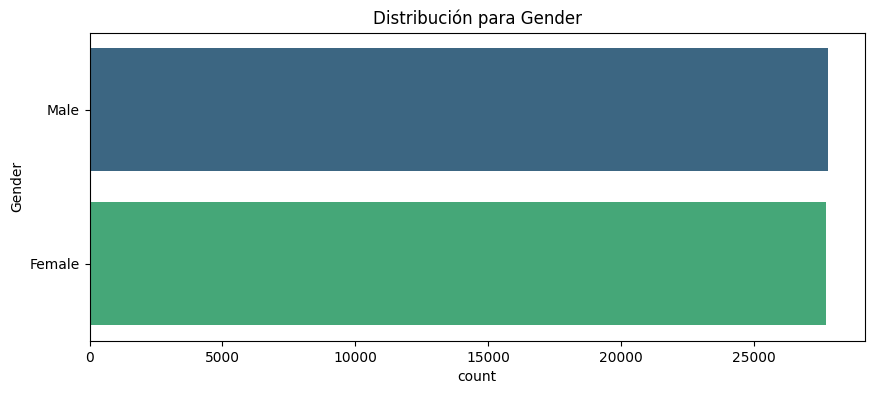

/var/folders/1m/knww9kwx5h7fh3m8lly94_br6k_qlj/T/ipykernel_25906/1632866130.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")


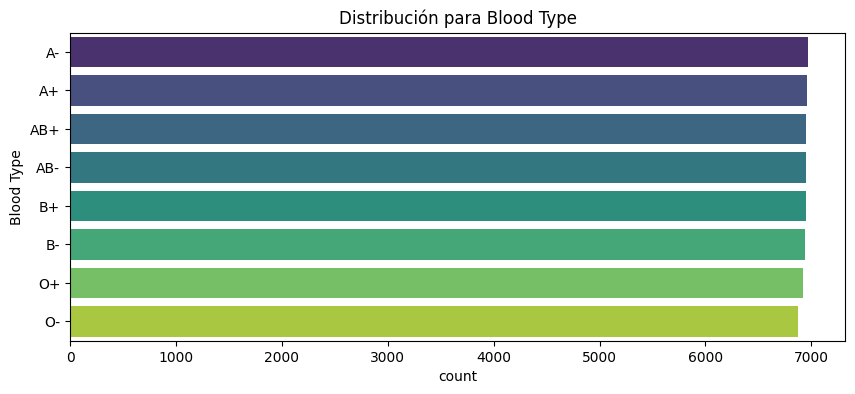

/var/folders/1m/knww9kwx5h7fh3m8lly94_br6k_qlj/T/ipykernel_25906/1632866130.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")


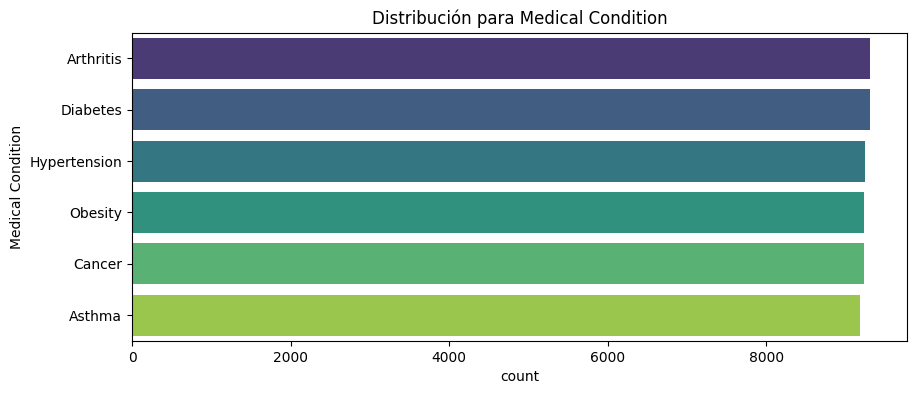

/var/folders/1m/knww9kwx5h7fh3m8lly94_br6k_qlj/T/ipykernel_25906/1632866130.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")


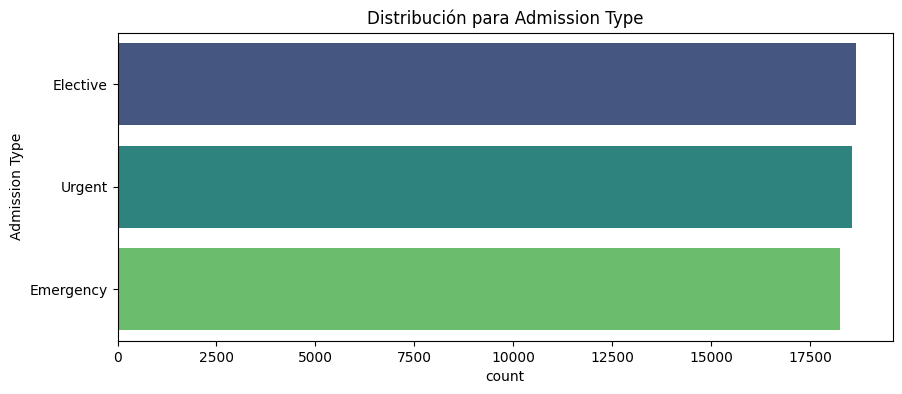

/var/folders/1m/knww9kwx5h7fh3m8lly94_br6k_qlj/T/ipykernel_25906/1632866130.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")


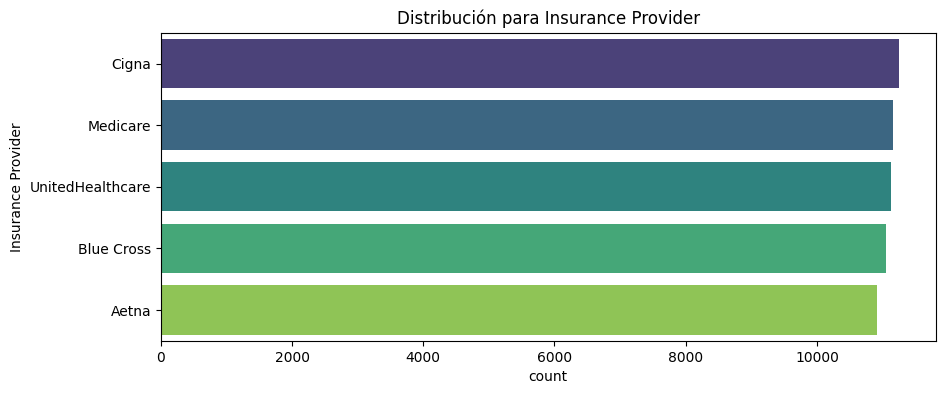

/var/folders/1m/knww9kwx5h7fh3m8lly94_br6k_qlj/T/ipykernel_25906/1632866130.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")


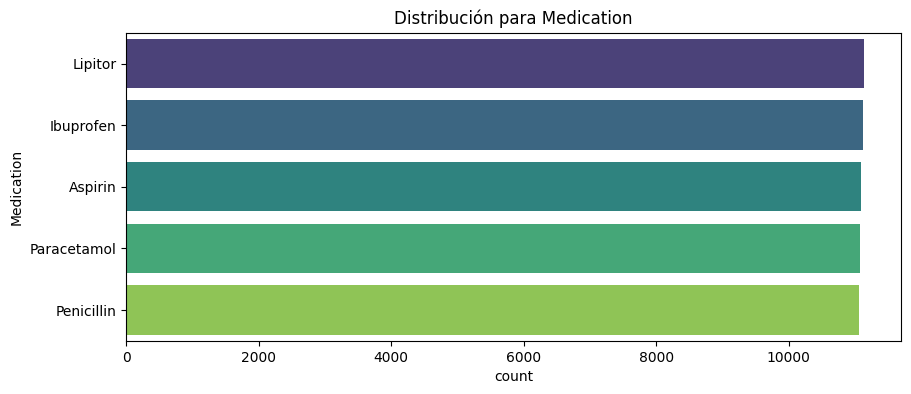

In [5]:
# Plot distribution for categorical variables
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Insurance Provider', 'Medication']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f'Distribución para {col}')
    plt.show()

/var/folders/1m/knww9kwx5h7fh3m8lly94_br6k_qlj/T/ipykernel_25906/340261050.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top5, y=col, order=top5_categories, palette="viridis")


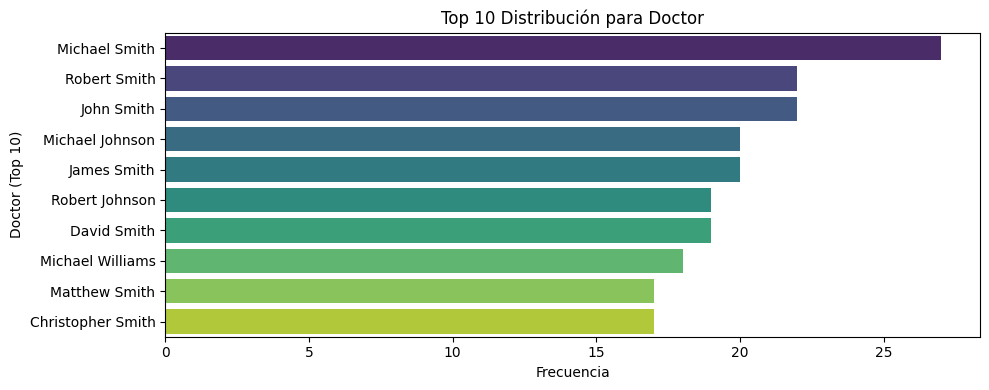

/var/folders/1m/knww9kwx5h7fh3m8lly94_br6k_qlj/T/ipykernel_25906/340261050.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top5, y=col, order=top5_categories, palette="viridis")


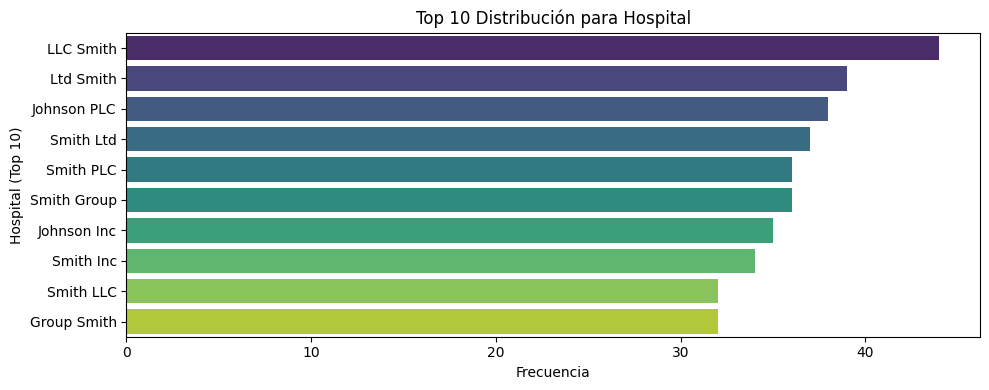

In [6]:
# Lista de columnas a analizar
categorical_cols = ['Doctor','Hospital']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    
    # Obtener las top 5 categorías más frecuentes
    top5_categories = df[col].value_counts().nlargest(10).index
    
    # Filtrar el DataFrame para estas categorías
    df_top5 = df[df[col].isin(top5_categories)]
    
    # Graficar
    sns.countplot(data=df_top5, y=col, order=top5_categories, palette="viridis")
    plt.title(f'Top 10 Distribución para {col}')
    plt.ylabel(f'{col} (Top 10)')
    plt.xlabel('Frecuencia')
    plt.tight_layout()
    plt.show()

In [5]:
# Convertir fechas a formato datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Ingeniería de características: calcular la estancia en días
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

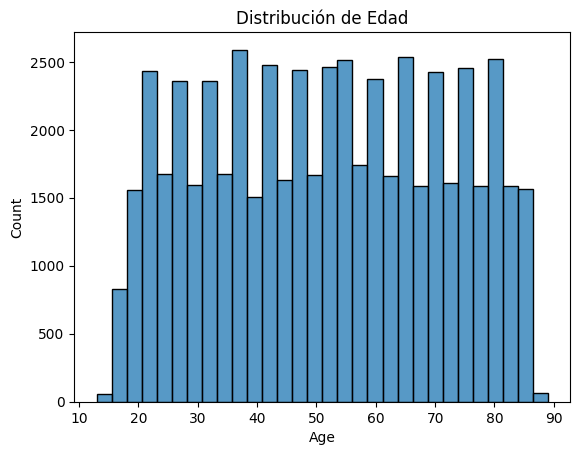

In [8]:
# Visualización de la distribución de edades
sns.histplot(df['Age'], bins=30)
plt.title('Distribución de Edad')
plt.show()

/var/folders/1m/knww9kwx5h7fh3m8lly94_br6k_qlj/T/ipykernel_25906/3629786913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Test Results', order=df['Test Results'].value_counts().index, palette="coolwarm")


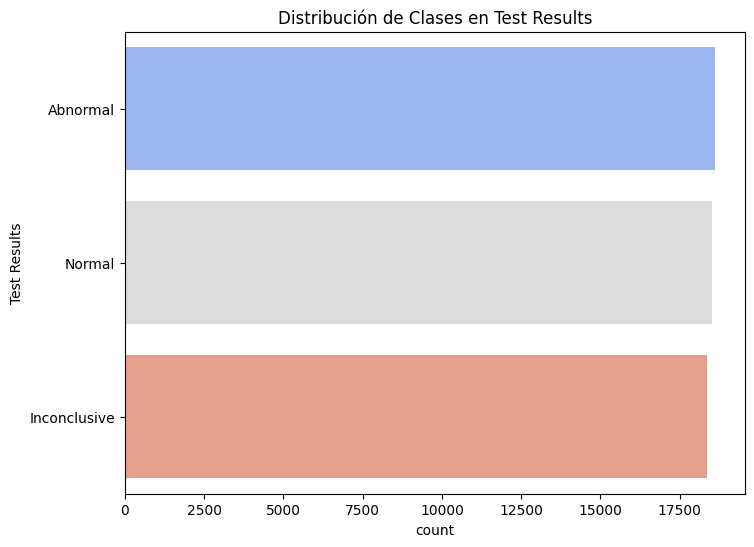

Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64
Test Results
Abnormal        33.562162
Normal          33.363964
Inconclusive    33.073874
Name: count, dtype: float64


In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='Test Results', order=df['Test Results'].value_counts().index, palette="coolwarm")
plt.title('Distribución de Clases en Test Results')
plt.show()

# Mostrar el conteo de las clases
class_balance = df['Test Results'].value_counts()
print(class_balance)

# Calcular el porcentaje de cada clase
class_percentages = class_balance / len(df) * 100
print(class_percentages)

/var/folders/1m/knww9kwx5h7fh3m8lly94_br6k_qlj/T/ipykernel_25906/843824981.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Test Results', y='Age', palette="Set3")


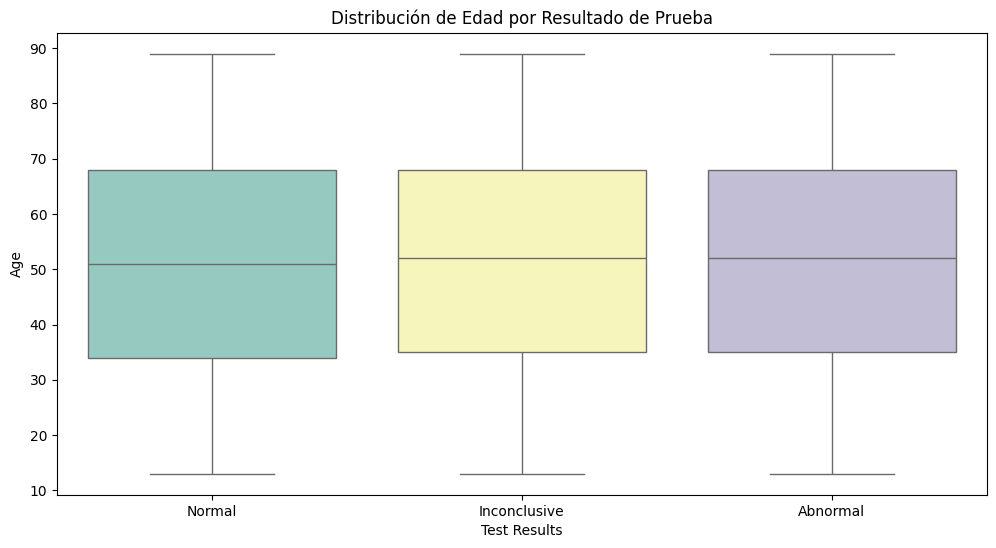

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Test Results', y='Age', palette="Set3")
plt.title('Distribución de Edad por Resultado de Prueba')
plt.show()


## **Model**

In [6]:
# Detección y manejo de valores atípicos en 'Billing Amount'
df = df[df['Billing Amount'] > 0]  # Eliminamos registros con valores negativos en los costos

In [7]:
# División de características en numéricas y categóricas
numeric_features = ['Age', 'Billing Amount', 'Length of Stay']
categorical_features = [
    'Gender',
    'Blood Type',
    'Medical Condition',
    'Admission Type',
    'Insurance Provider',
    'Medication'
]

# Preprocesamiento de datos
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicar transformaciones
X = df.drop(columns=['Test Results', 'Name', 'Date of Admission', 'Doctor', 'Room Number', 'Discharge Date'])  # Ajusta según tu objetivo
X = preprocessor.fit_transform(X)

# Suponiendo que 'Test Results' es la variable objetivo a predecir
y = df['Test Results'].values

In [8]:
# Codificar las etiquetas a números
label_encoder = LabelEncoder()
y_sampled_numeric = label_encoder.fit_transform(df['Test Results'])

# Convertir a codificación one-hot
y_sampled_one_hot = to_categorical(y_sampled_numeric)

In [12]:
# Conversión de matriz dispersa a matriz densa
X_dense = X.toarray()

# Dividir los datos con etiquetas one-hot
X_train, X_test, y_train, y_test = train_test_split(X_dense, y_sampled_one_hot, test_size=0.2, random_state=42)

# Crear el modelo
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Tres clases

# Compilar el modelo para clasificación multiclase
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=8, verbose=1)

# Evaluar el modelo
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Pérdida de entrenamiento: {train_loss}, Precisión de entrenamiento: {train_accuracy}')
print(f'Pérdida de prueba: {test_loss}, Precisión de prueba: {test_accuracy}')

Epoch 1/20
5540/5540 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.3370 - loss: 1.1057 - val_accuracy: 0.3323 - val_loss: 1.0988
Epoch 2/20
5540/5540 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3334 - loss: 1.0988 - val_accuracy: 0.3341 - val_loss: 1.0989
Epoch 3/20
5540/5540 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3441 - loss: 1.0980 - val_accuracy: 0.3274 - val_loss: 1.0998
Epoch 4/20
5540/5540 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3510 - loss: 1.0975 - val_accuracy: 0.3255 - val_loss: 1.1003
Epoch 5/20
5540/5540 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3547 - loss: 1.0967 - val_accuracy: 0.3290 - val_loss: 1.1002
Epoch 6/20
5540/5540 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3550 - loss: 1.0961 - val_accuracy: 0.3293 - val_loss: 1.1008
Epoch 7/20
5540/5540 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3504 - loss: 1.0957 - val_accuracy: 0.3308 - val_loss: 1.1003
Epoch 8/20
5540/5540 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3553 - loss: 1.0948 -

Precisión de entrenamiento: 0.36707061529159546
Precisión de prueba: 0.3292715847492218


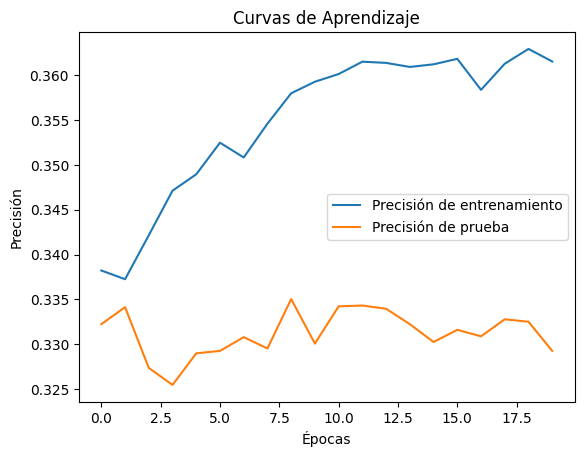

In [14]:
# Suponiendo que ya tenemos las variables train_accuracy y test_accuracy del paso anterior
print(f'Precisión de entrenamiento: {train_accuracy}')
print(f'Precisión de prueba: {test_accuracy}')

# Curvas de aprendizaje
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de prueba')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Curvas de Aprendizaje')
plt.legend()
plt.show()

Se observa un poco de sobreajuste en el gráfico, lo que podría mitigarse mediante una regularizaciónde tipo L1 o L2

In [31]:
# Conversión de matriz dispersa a matriz densa
X_dense = X.toarray()

# Dividir los datos con etiquetas one-hot
X_train, X_test, y_train, y_test = train_test_split(X_dense, y_sampled_one_hot, test_size=0.2, random_state=42)

# Crear el modelo
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='linear'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Tres clases

# Compilar el modelo para clasificación multiclase
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=8, verbose=1)

# Evaluar el modelo
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Pérdida de entrenamiento: {train_loss}, Precisión de entrenamiento: {train_accuracy}')
# print(f'Pérdida de prueba: {test_loss}, Precisión de prueba: {test_accuracy}')

Epoch 1/30


/home/emil/anaconda3/envs/deep_learning/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5540/5540 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.3331 - loss: 1.1012 - val_accuracy: 0.3298 - val_loss: 1.0987
Epoch 2/30
5540/5540 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3376 - loss: 1.0986 - val_accuracy: 0.3298 - val_loss: 1.0988
Epoch 3/30
5540/5540 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3303 - loss: 1.0987 - val_accuracy: 0.3298 - val_loss: 1.0988
Epoch 4/30
5540/5540 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3365 - loss: 1.0987 - val_accuracy: 0.3372 - val_loss: 1.0986
Epoch 5/30
5540/5540 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3336 - loss: 1.0987 - val_accuracy: 0.3298 - val_loss: 1.0987
Epoch 6/30
5540/5540 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3279 - loss: 1.0987 - val_accuracy: 0.3330 - val_loss: 1.0986
Epoch 7/30
5540/5540 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3335 - loss: 1.0987 - val_accuracy: 0.3330 - val_loss: 1.0990
Epoch 8/30
5540/5540 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.3416 - loss: 1.0985 - val_accura

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,075 (8.11 KB)

 Trainable params: 691 (2.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,384 (5.41 KB)

347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


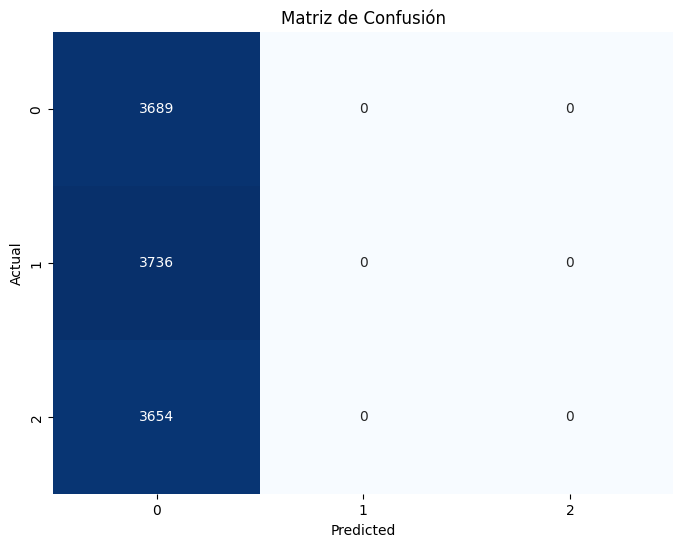

In [32]:
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)  # Convierte las probabilidades a etiquetas de clase

y_test_classes = np.argmax(y_test, axis=1) # Convierte y_train de One-Hot a etiquetas (categorías)

cm = confusion_matrix(y_test_classes, y_pred_classes)
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

Se observa un fuerte sesgo hacia la clase 0 a la hora de realizar las predicciones

Precisión de entrenamiento: 0.3362444341182709
Precisión de prueba: 0.33297228813171387


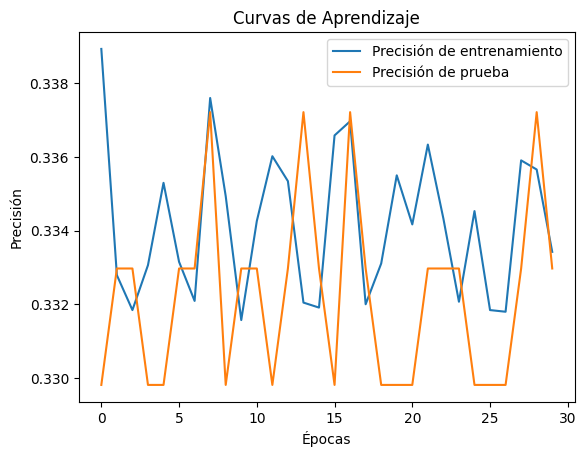

In [15]:
# Suponiendo que ya tenemos las variables train_accuracy y test_accuracy del paso anterior
print(f'Precisión de entrenamiento: {train_accuracy}')
print(f'Precisión de prueba: {test_accuracy}')

# Curvas de aprendizaje
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de prueba')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Curvas de Aprendizaje')
plt.legend()
plt.show()

Precisión de entrenamiento: 0.9989168047904968
Precisión de prueba: 0.44164636731147766


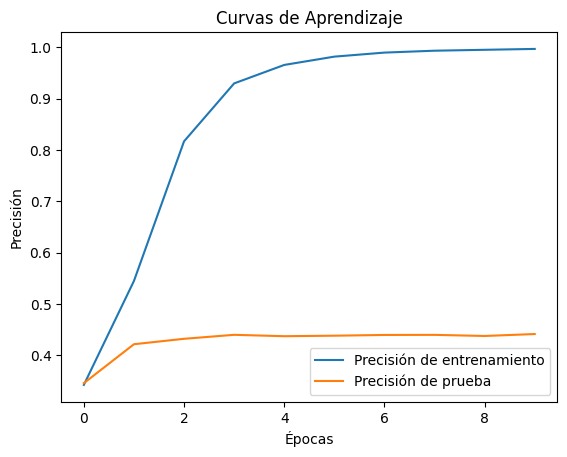

In [15]:
# Suponiendo que ya tenemos las variables train_accuracy y test_accuracy del paso anterior
print(f'Precisión de entrenamiento: {train_accuracy}')
print(f'Precisión de prueba: {test_accuracy}')

# Curvas de aprendizaje
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de prueba')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Curvas de Aprendizaje')
plt.legend()
plt.show()

In [26]:
from keras_tuner import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_layer_1', min_value=4, max_value=256, step=4),
                    activation=hp.Choice("activation", ['relu', 'linear']), input_shape=(X_train.shape[1],)))
    model.add(Dense(units=hp.Int('units_layer_2', min_value=4, max_value=128, step=4),
                    activation=hp.Choice("activation", ['relu', 'linear']),))
    model.add(Dense(3, activation='softmax'))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-1,  sampling="log")
    model.compile(
        optimizer=optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=30, executions_per_trial=5,
                     directory='my_dir', project_name='mlp_tuning')

tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Obtener los mejores hiperparámetros
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f'Mejores hiperparámetros: {best_hyperparameters.values}')

# Comparación con el modelo base
base_accuracy = test_accuracy
tuned_accuracy = best_model.evaluate(X_test, y_test)[1]

print(f'Precisión base: {base_accuracy}')
print(f'Precisión ajustada: {tuned_accuracy}')

Trial 30 Complete [00h 01m 38s]
val_accuracy: 0.34017509818077085

Best val_accuracy So Far: 0.349309504032135
Total elapsed time: 01h 08m 35s


/home/emil/anaconda3/envs/deep_learning/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Mejores hiperparámetros: {'units_layer_1': 32, 'units_layer_2': 24, 'activation': 'relu', 'lr': 0.0001}
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.3507 - loss: 1.1027
Precisión base: 0.3292715847492218
Precisión ajustada: 0.349309504032135


347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step


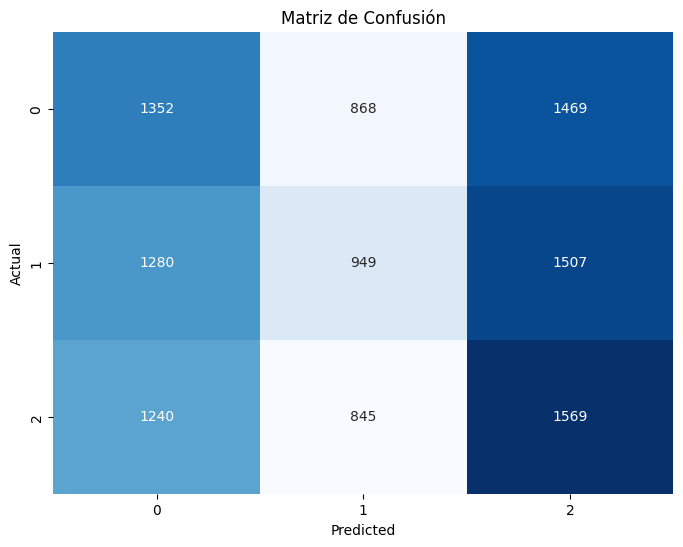

In [30]:
y_pred = best_model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)  # Convierte las probabilidades a etiquetas de clase

y_test_classes = np.argmax(y_test, axis=1) # Convierte y_train de One-Hot a etiquetas (categorías)

cm = confusion_matrix(y_test_classes, y_pred_classes)
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

Se observa en la matriz de confución que aún después de realizar el random search, las predicciones no mejoran de manera considerable.

In [20]:
grid.fit(X_train, y_train)

ValueError: Invalid parameter 'preprocessor' for estimator ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'Billing Amount', 'Length of Stay']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Gender', 'Blood Type', 'Medical Condition',
                                  'Admission Type', 'Insurance Provider',
                                  'Medication'])]). Valid parameters are: ['force_int_remainder_cols', 'n_jobs', 'remainder', 'sparse_threshold', 'transformer_weights', 'transformers', 'verbose', 'verbose_feature_names_out'].

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo con EarlyStopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

Cuando se entrena un red neuronal sobre un conjunto de entrenamiento, se desea que la red aprenda el comportamiento estadístico, pero que no trate de imitar los patrones de ruido de este conjunto pues esto puede generar sobreentrenamiento, lo que finalmente degradará el desempeño del modelo a la hora de analizar un conjunto de datos desconocidos lo que aumentará el error general del modelo.

El reto entonces es entrenar el modelo lo suficiente para que aprenda los patrones globales que rigen el fenómeno, pero no llegar a un nivel de sobre-ajuste debido al ruido presente en el conjunto de entrenamiento.

Es este jústamente es el problema que ataca el early stopping mediante el análisis de un conjunto de validación hasta el momento en el que el desempeño del modelo comienza a degradarse dado el monitoreo de algún tipo de métrica como el accuracy, interrumpiendo el entrenamiento y dejando al modelo en el último estado óptimo antes de comenzar la degradación. Para automatiar este proces,es posible utilizar el objeto de Keras llamado callbacks que debe pasarse al modelo como un argumento y que permite realizar diferentes tipos de acciones en ciertos momentos del entrenamiento como al inicio o al final de cada época.

Los parámetros más relevantes de EarlyStoppng son:

monitor: Indica la métrica que será monitoreada para detener el entrenamiento dado una degradación.
patience: Indica el número de épocas que se esperarán antes de detener el entrenamiento.
restore_best_weights: Valor booleano que indica si los pesos de la red serán reiniciados a la iteración en la cual la métrica monitoreada tuve su valor más óptimo.
